In [96]:
rm(list =ls())

In [97]:
library(neuralnet)
library(ggplot2)
library(nnet)
library(dplyr)
library(reshape2)

In [98]:
library(caret)

In [99]:
df<- read.csv(file = "C:/q4.csv",header = TRUE,sep = ",")

In [100]:
newRow <- data.frame(x=5,y=9,Class='unowned')

In [101]:
df <- rbind(df,newRow)

In [102]:
newRow1 <- data.frame(x=5,y=10,Class='unowned')

In [103]:
df <- rbind(df,newRow1)

In [104]:
df

x,y,Class
10.5,5.0,unowned
7.5,6.0,unowned
2.0,5.0,owned
3.0,4.0,unowned
3.5,8.0,owned
6.5,6.5,owned
1.5,6.0,owned
6.5,8.0,owned
8.0,4.0,unowned
10.5,9.0,owned


In [105]:
labels <- class.ind(as.factor(df$Class))

In [106]:
f <- as.formula("unowned + owned ~ x + y")

In [107]:
standardiser <- function(x){
  (x-min(x))/(max(x)-min(x))
}

In [108]:
df[, 1:2] <- lapply(df[, 1:2], standardiser)

In [109]:
pre_process_iris <- cbind(df[,1:2], labels)

In [110]:
pre_process_iris

x,y,owned,unowned
1.00000000,0.1666667,0,1
0.66666667,0.3333333,0,1
0.05555556,0.1666667,1,0
0.16666667,0.0000000,0,1
0.22222222,0.6666667,1,0
0.55555556,0.4166667,1,0
0.00000000,0.3333333,1,0
0.55555556,0.6666667,1,0
0.72222222,0.0000000,0,1
1.00000000,0.8333333,1,0


In [111]:
f <- as.formula("unowned + owned ~ x + y")

In [112]:
iris_net <- neuralnet(f, data =  pre_process_iris, hidden = 1, act.fct = "tanh", linear.output = FALSE)

In [113]:
iris_net$result.matrix

error,2.067347211
reached.threshold,0.007795613
steps,293.000000000
Intercept.to.1layhid1,1.926778201
x.to.1layhid1,-23.604573671
y.to.1layhid1,5.526114363
Intercept.to.unowned,0.354258325
1layhid1.to.unowned,-0.435383691
Intercept.to.owned,1.200755199
1layhid1.to.owned,0.858152697


In [118]:
library(tidyverse)
library(neuralnet)
library(GGally)

Warning message:
"package 'GGally' was built under R version 3.5.3"
Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [117]:
install.packages("GGally",repos = "http://cran.us.r-project.org")


also installing the dependencies 'prettyunits', 'progress', 'reshape'



package 'prettyunits' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpcRGDR3\downloaded_packages


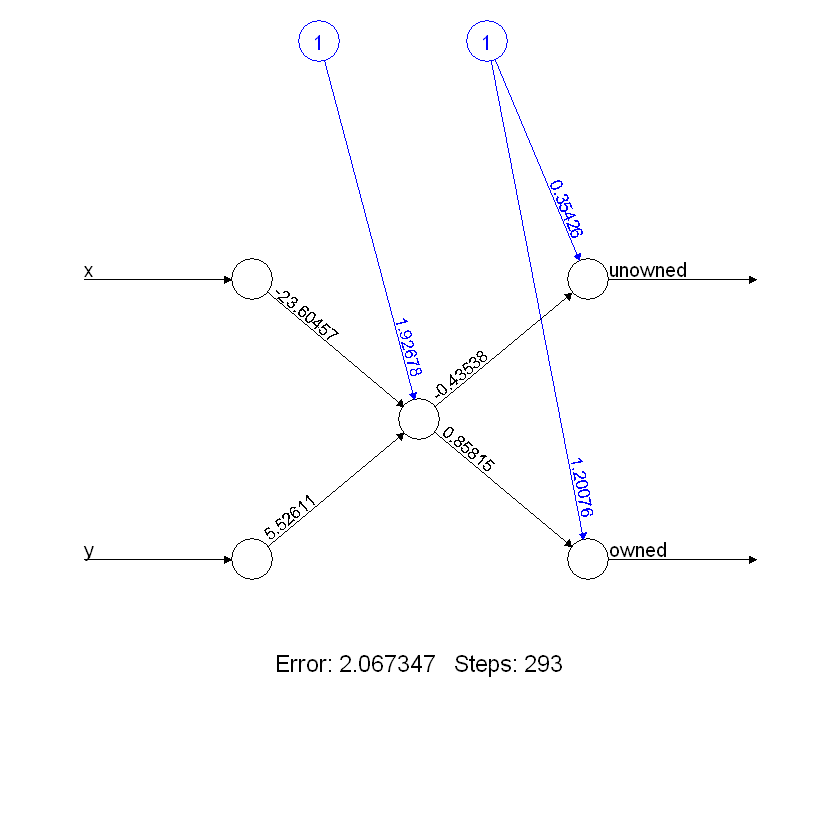

In [119]:
plot(iris_net, rep = 'best')

In [124]:
# Compute predictions
compute(iris_net, pre_process_iris[, 1:2])

ERROR: Error in UseMethod("compute"): no applicable method for 'compute' applied to an object of class "nn"
